In [16]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [17]:
import seaborn as sns

C:\Users\sunse\AppData\Local\Temp\ipykernel_21092\3715168159.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),fontsize=9)
C:\Users\sunse\AppData\Local\Temp\ipykernel_21092\3715168159.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(),fontsize=9)


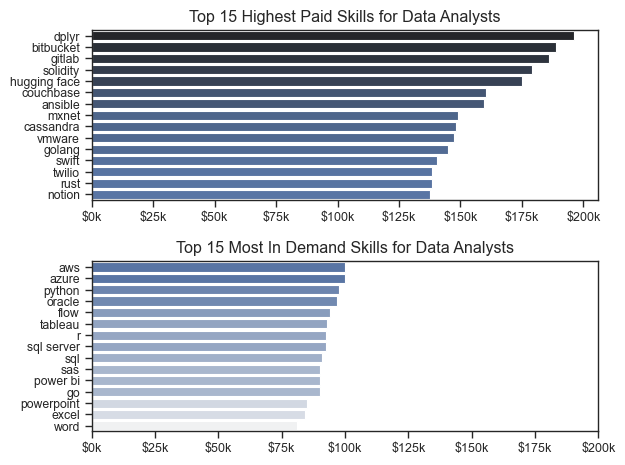

In [28]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_top_pay = df_DA_US_group.sort_values(by='median',ascending=False).head(15)
df_DA_skills = df_DA_US_group.sort_values(by='count',ascending=False).head(15).sort_values(by='median',ascending=False)
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')
sns.set_context('paper',font_scale=1.2)
sns.barplot(data=df_DA_top_pay,x='median',y=df_DA_top_pay.index,ax=ax[0],hue='median',palette='dark:b_r')
ax[0].set_title('Top 15 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}k'))
ax[0].legend().remove()
ax[0].set_xticklabels(ax[0].get_xticklabels(),fontsize=9)
sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index,ax=ax[1],hue='median',palette='light:b')

ax[1].set_title('Top 15 Most In Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].legend().remove()
ax[1].set_xticklabels(ax[1].get_xticklabels(),fontsize=9)

ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}k'))

plt.xlim(0,200000)

fig.tight_layout()

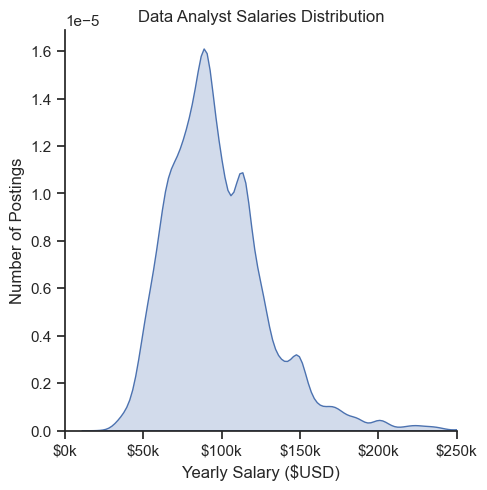

In [39]:
sns.set_theme(style='ticks')
sns.displot(df_DA_US['salary_year_avg'],kind='kde',fill=True)
plt.xlim(0,250000)
plt.title('Data Analyst Salaries Distribution')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Number of Postings')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))


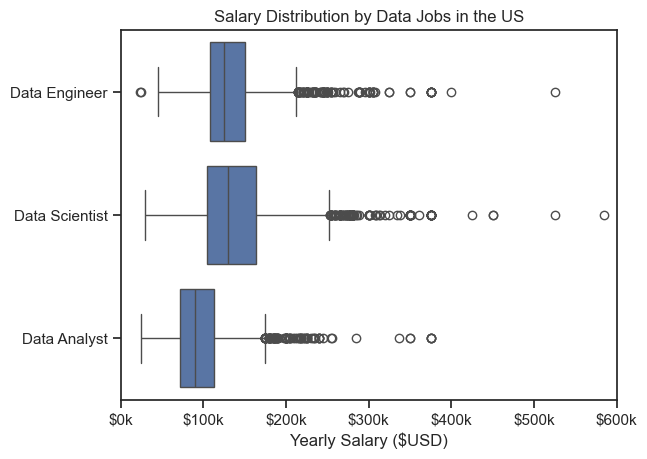

In [47]:
job_titles=['Data Analyst','Data Scientist','Data Engineer']
df_US=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_US=df_US.dropna(subset=['salary_year_avg'])
job_list= [df_US[df_US['job_title_short']==job_title]['salary_year_avg']  for job_title in job_titles]

sns.boxplot(data=df_US,x='salary_year_avg',y='job_title_short')
plt.title('Salary Distribution by Data Jobs in the US')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
plt.xlim(0,600000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()